In [ ]:
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np

import PIL
from keras import layers
from keras.layers import Dense,Flatten,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Load data

In [ ]:
image_size = (128, 128)
batch_size = 128

In [ ]:
shutil.unpack_archive("/content/drive/MyDrive/Data Science - Master Notes/DL4CV Final Project/data-emotion-dataset.zip", "/emotion-dataset")

In [ ]:
shutil.unpack_archive("/content/drive/MyDrive/Data Science - Master Notes/DL4CV Final Project/data-wikiart-emotion-dataset.zip", "/wikiart-emotion-dataset")

In [ ]:
paths = [
    '/data/test/negative',
    '/data/test/other',
    '/data/test/positive',
    '/data/train/negative',
    '/data/train/other',
    '/data/train/positive',
    '/data/validation/negative',
    '/data/validation/other',
    '/data/validation/positive',
]

In [ ]:
newpath = '/content/data' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

newpath = '/content/data/train' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

newpath = '/content/data/train/positive' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
newpath = '/content/data/train/negative' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
newpath = '/content/data/train/other' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

newpath = '/content/data/validation' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

newpath = '/content/data/validation/positive' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
newpath = '/content/data/validation/negative' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
newpath = '/content/data/validation/other' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

newpath = '/content/data/test' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

newpath = '/content/data/test/positive' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
newpath = '/content/data/test/negative' 
if not os.path.exists(newpath):
    os.makedirs(newpath)
newpath = '/content/data/test/other' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
for p in paths:
  imgs = os.listdir('/emotion-dataset/content' + p)
  for img in imgs:
    current_path = '/emotion-dataset/content' + p + '/' + img
    new_path = '/content/' + p + '/' + img
    shutil.copy(current_path, new_path)

for p in paths:
  imgs = os.listdir('/wikiart-emotion-dataset/content' + p)
  for img in imgs:
    current_path = '/wikiart-emotion-dataset/content' + p + '/' + img
    new_path = '/content/' + p + '/' + img
    shutil.copy(current_path, new_path)

In [ ]:
emotion_dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 12055 files belonging to 3 classes.


In [ ]:
emotion_dataset_val = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4765 files belonging to 3 classes.


In [ ]:
emotion_dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 7555 files belonging to 3 classes.


In [ ]:
LABELS = ['negative', 'other', 'positive']

In [ ]:
train_imgs = list(emotion_dataset_train)

In [ ]:
imgs = list(list(train_imgs[0])[0])
labels = list(list(train_imgs[0])[1])

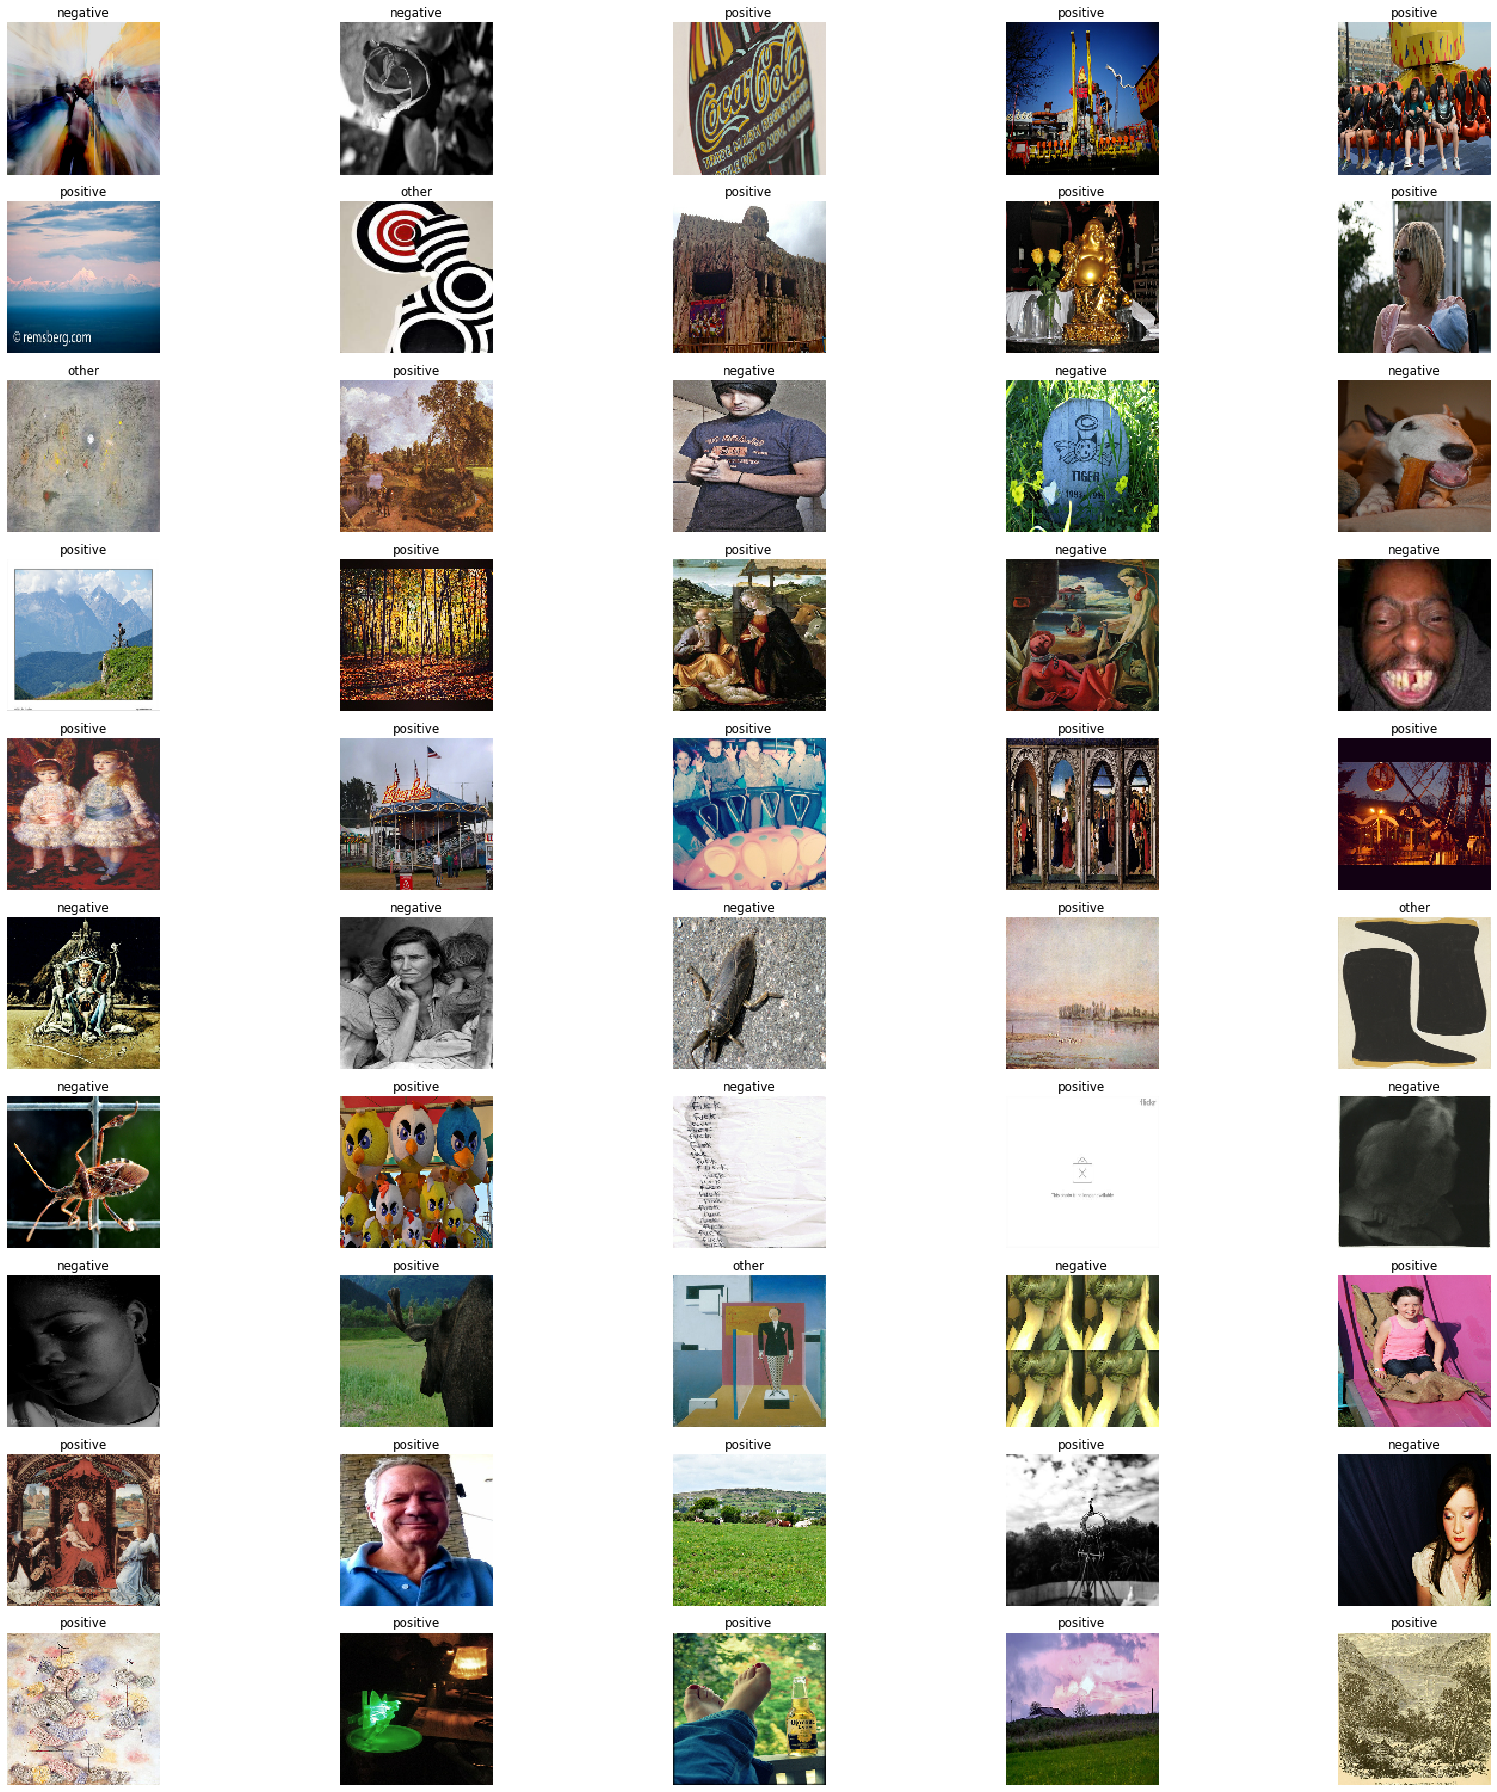

In [ ]:
# each row is its own class
rows, cols = 10, 5
fig, axes = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row',
                       figsize=(25, 25))
ind = 0
for row in range(rows):
  for col in range(cols):
    axes[row, col].imshow(imgs[ind]/255, interpolation='nearest')
    axes[row, col].axis('off')
    axes[row, col].set_title(LABELS[np.array(labels[ind]).argmax()])
    ind += 1

fig.tight_layout()
plt.show()

# Normalize Data

In [ ]:
def normalize(image,label):
    image = tf.cast(image/255.0 ,tf.float32)
    return image,label

In [ ]:
# emotion_dataset_train = emotion_dataset_train.map(normalize)
# emotion_dataset_val = emotion_dataset_val.map(normalize)
# emotion_dataset_test = emotion_dataset_test.map(normalize)

# Transfer learning

In [ ]:
epochs = 15

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(image_size[0],image_size[1],3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [ ]:
resnet_model.add(Flatten())
resnet_model.add(layers.Normalization())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 normalization_2 (Normalizat  (None, 2048)             4097      
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 3)                 771       
                                                      

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

resnet_model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(emotion_dataset_train, validation_data=emotion_dataset_val, epochs=epochs, callbacks=[early_stopping])

Epoch 1/15
95/95 [==============================] - 190s 2s/step - loss: 2.5822 - accuracy: 0.6633 - val_loss: 0.5141 - val_accuracy: 0.7614
Epoch 2/15
95/95 [==============================] - 186s 2s/step - loss: 0.5840 - accuracy: 0.7286 - val_loss: 0.5476 - val_accuracy: 0.7444
Epoch 3/15
95/95 [==============================] - 185s 2s/step - loss: 0.5341 - accuracy: 0.7573 - val_loss: 0.5094 - val_accuracy: 0.7618
Epoch 4/15
95/95 [==============================] - 183s 2s/step - loss: 0.5074 - accuracy: 0.7710 - val_loss: 0.5553 - val_accuracy: 0.7398
Epoch 5/15
95/95 [==============================] - 182s 2s/step - loss: 0.4885 - accuracy: 0.7801 - val_loss: 0.5688 - val_accuracy: 0.7408
Epoch 6/15
95/95 [==============================] - 180s 2s/step - loss: 0.4505 - accuracy: 0.7943 - val_loss: 0.5819 - val_accuracy: 0.7427
Epoch 7/15
95/95 [==============================] - 181s 2s/step - loss: 0.4405 - accuracy: 0.8010 - val_loss: 0.5544 - val_accuracy: 0.7534
Epoch 8/15
95

## History Plots

In [ ]:
num_epochs = len(history.history['loss'])

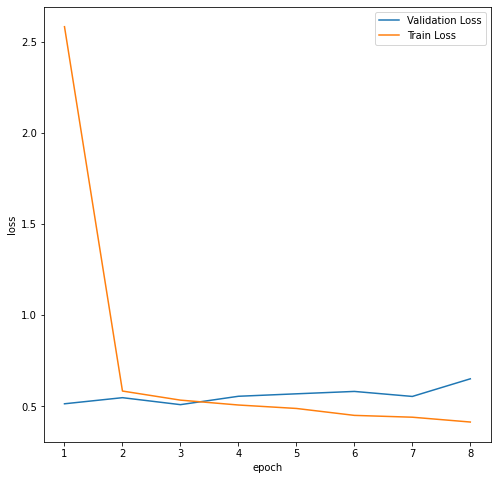

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot([i for i in range(1, num_epochs + 1)], history.history['val_loss'], label='Validation Loss')
ax.plot([i for i in range(1, num_epochs + 1)], history.history['loss'], label='Train Loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
plt.legend(loc="upper right")
plt.show()

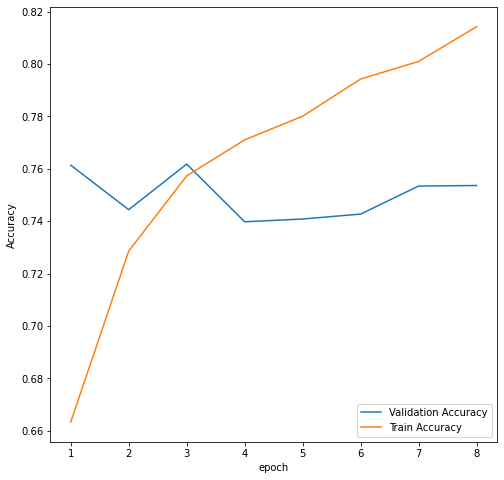

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot([i for i in range(1, num_epochs + 1)], history.history['val_accuracy'], label='Validation Accuracy')
ax.plot([i for i in range(1, num_epochs + 1)], history.history['accuracy'], label='Train Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

## Test Score

In [ ]:
score = resnet_model.evaluate(emotion_dataset_test)
print('Test Accuracy: {:.3f}'.format(score[1]))

60/60 [==============================] - 60s 871ms/step - loss: 0.5287 - accuracy: 0.7481
Test Accuracy: 0.748


# Unfreeze and train all layers

In [ ]:
for layer in pretrained_model.layers:
        layer.trainable=True

In [ ]:
history = resnet_model.fit(emotion_dataset_train, validation_data=emotion_dataset_val, epochs=epochs, callbacks=[early_stopping])

Epoch 1/15
95/95 [==============================] - 181s 2s/step - loss: 0.5108 - accuracy: 0.7661 - val_loss: 0.5520 - val_accuracy: 0.7419
Epoch 2/15
95/95 [==============================] - 183s 2s/step - loss: 0.4805 - accuracy: 0.7818 - val_loss: 0.5608 - val_accuracy: 0.7536
Epoch 3/15
95/95 [==============================] - 187s 2s/step - loss: 0.4628 - accuracy: 0.7900 - val_loss: 0.5765 - val_accuracy: 0.7549
Epoch 4/15
95/95 [==============================] - 185s 2s/step - loss: 0.4324 - accuracy: 0.8044 - val_loss: 0.6089 - val_accuracy: 0.7448
Epoch 5/15
95/95 [==============================] - 186s 2s/step - loss: 0.4019 - accuracy: 0.8196 - val_loss: 0.6512 - val_accuracy: 0.7490
Epoch 6/15
95/95 [==============================] - 185s 2s/step - loss: 0.4025 - accuracy: 0.8186 - val_loss: 0.6300 - val_accuracy: 0.7352


## Plots

In [ ]:
num_epochs = len(history.history['loss'])

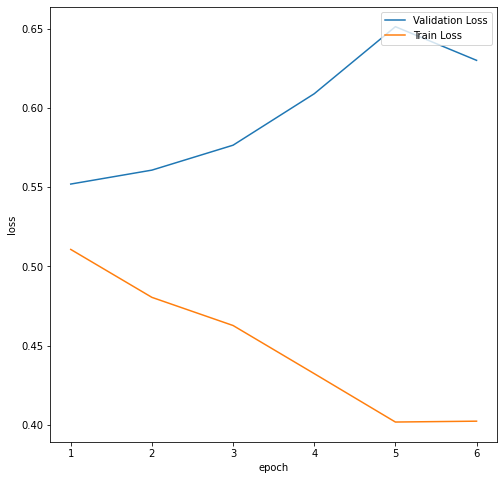

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot([i for i in range(1, num_epochs + 1)], history.history['val_loss'], label='Validation Loss')
ax.plot([i for i in range(1, num_epochs + 1)], history.history['loss'], label='Train Loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
plt.legend(loc="upper right")
plt.show()

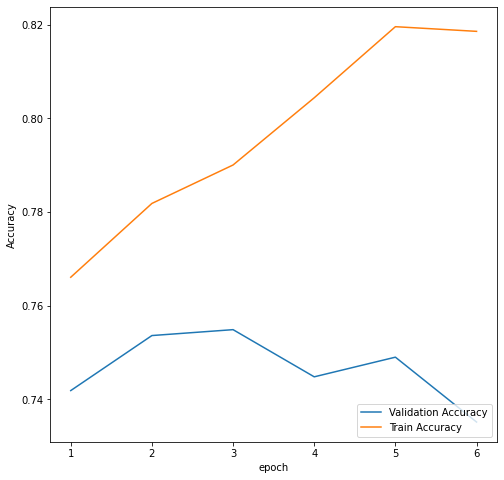

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot([i for i in range(1, num_epochs + 1)], history.history['val_accuracy'], label='Validation Accuracy')
ax.plot([i for i in range(1, num_epochs + 1)], history.history['accuracy'], label='Train Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
score = resnet_model.evaluate(emotion_dataset_test)
print('Test Accuracy: {:.3f}'.format(score[1]))

60/60 [==============================] - 58s 839ms/step - loss: 0.5657 - accuracy: 0.7332
Test Accuracy: 0.733


# Save Model

In [ ]:
resnet_model.save('/content/drive/MyDrive/Data Science - Master Notes/DL4CV Final Project/resnet50_512_256_3_earlystop_accuracy_layernormalization')